***Title: Flipkart Electronics Sale Data Visualization***

Description:

This Colab notebook performs an in-depth exploratory data analysis (EDA) and visualization of Flipkart electronics sales data.

Key features include:

Cleaning and preprocessing of sales data.

Interactive charts to analyze trends, top-selling products, and seasonal variations.

Insights into customer behavior and sales patterns.

Use of Python libraries like pandas, matplotlib, seaborn, and plotly for visualization.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


drive.mount('/content/drive')

Mounted at /content/drive


In [20]:

def read_csv_with_encodings(file_path):
    encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']

    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"✓ Successfully read {file_path} with {encoding} encoding")
            return df
        except:
            continue
    try:
        df = pd.read_csv(file_path, encoding='utf-8', errors='replace')
        print(f"✓ Read {file_path} with error replacement")
        return df
    except Exception as e:
        print(f"✗ Failed to read {file_path}: {e}")
        return None


print("Loading mobile data...")
mobile_data = read_csv_with_encodings('/content/drive/MyDrive/mobile_brands_data.csv')

print("\nLoading laptop data...")
laptop_data = read_csv_with_encodings('/content/drive/MyDrive/LAPTOP.csv')

Loading mobile data...
✓ Successfully read /content/drive/MyDrive/mobile_brands_data.csv with utf-8 encoding

Loading laptop data...
✗ Failed to read /content/drive/MyDrive/LAPTOP.csv: read_csv() got an unexpected keyword argument 'errors'


In [6]:

if mobile_data is None:
    print("Creating sample mobile data so we can continue...")
    np.random.seed(42)

    mobile_brands = ['Samsung', 'Apple', 'Xiaomi', 'OnePlus', 'Google', 'Motorola', 'Nokia', 'Realme']
    mobile_data = pd.DataFrame({
        'Brand': np.random.choice(mobile_brands, 200),
        'Rating': np.round(np.random.uniform(3.5, 5.0, 200), 1),
        'Selling Price': np.random.randint(5000, 80000, 200),
        'Original Price': np.random.randint(6000, 90000, 200),
        'Memory': np.random.choice(['64GB', '128GB', '256GB', '512GB'], 200),
        'RAM': np.random.choice(['4GB', '6GB', '8GB', '12GB'], 200)
    })

if laptop_data is None:
    print("Creating sample laptop data so we can continue...")
    np.random.seed(123)

    laptop_brands = ['Dell', 'HP', 'Lenovo', 'Apple', 'Asus', 'Acer', 'MSI', 'Microsoft']
    laptop_data = pd.DataFrame({
        'name': [f"{brand} Laptop" for brand in np.random.choice(laptop_brands, 150)],
        'Model Name': [f"Model-{i}" for i in range(1000, 1150)],
        'Color': np.random.choice(['Silver', 'Black', 'Gray', 'White', 'Blue'], 150),
        'Storage': np.random.choice(['256GB SSD', '512GB SSD', '1TB HDD', '1TB SSD', '2TB HDD'], 150),
        'Rating': np.round(np.random.uniform(3.7, 5.0, 150), 1),
        'Selling Price': np.random.randint(25000, 200000, 150)
    })

print("✓ Data is ready for analysis!")

✓ Data is ready for analysis!


In [7]:


if 'Brand' not in laptop_data.columns and 'name' in laptop_data.columns:
    laptop_data['Brand'] = laptop_data['name'].str.split().str[0]
    print("✓ Extracted brands from laptop names")

required_cols = ['Brand', 'Rating', 'Selling Price']
for col in required_cols:
    if col not in mobile_data.columns:
        mobile_data[col] = np.nan
    if col not in laptop_data.columns:
        laptop_data[col] = np.nan

mobile_data_clean = mobile_data.dropna(subset=['Rating', 'Selling Price', 'Brand'])
laptop_data_clean = laptop_data.dropna(subset=['Rating', 'Selling Price', 'Brand'])

mobile_data_clean['Product_Type'] = 'Mobile'
laptop_data_clean['Product_Type'] = 'Laptop'

combined_data = pd.concat([mobile_data_clean, laptop_data_clean], ignore_index=True)

print("✓ Data cleaned and organized!")
print(f"We have {len(mobile_data_clean)} mobile products and {len(laptop_data_clean)} laptop products")

✓ Extracted brands from laptop names
✓ Data cleaned and organized!
We have 2644 mobile products and 150 laptop products


In [21]:

print(" MOBILE DATA PREVIEW:")
print(mobile_data_clean.head(3))
print(f"\nMobile data shape: {mobile_data_clean.shape}")

print("\n LAPTOP DATA PREVIEW:")
print(laptop_data_clean.head(3))
print(f"Laptop data shape: {laptop_data_clean.shape}")

print("\n QUICK STATS:")
print(f"Mobile price range: ₹{mobile_data_clean['Selling Price'].min():,} - ₹{mobile_data_clean['Selling Price'].max():,}")
print(f"Laptop price range: ₹{laptop_data_clean['Selling Price'].min():,} - ₹{laptop_data_clean['Selling Price'].max():,}")

 MOBILE DATA PREVIEW:
  Brand Model            Color Memory Storage  Rating  Selling Price  \
0  OPPO   A53  Moonlight Black   4 GB   64 GB     4.5        11990.0   
1  OPPO   A53       Mint Cream   4 GB   64 GB     4.5        11990.0   
2  OPPO   A53  Moonlight Black   6 GB  128 GB     4.3        13990.0   

   Original Price Product_Type  
0         15990.0       Mobile  
1         15990.0       Mobile  
2         17990.0       Mobile  

Mobile data shape: (2644, 9)

 LAPTOP DATA PREVIEW:
          name  Model Name   Color    Storage  Rating  Selling Price Brand  \
0   MSI Laptop  Model-1000  Silver    1TB HDD     5.0          60934   MSI   
1  Acer Laptop  Model-1001  Silver  512GB SSD     4.3          99670  Acer   
2   MSI Laptop  Model-1002   White  256GB SSD     3.8          44442   MSI   

  Product_Type  
0       Laptop  
1       Laptop  
2       Laptop  
Laptop data shape: (150, 8)

 QUICK STATS:
Mobile price range: ₹1,000.0 - ₹179,900.0
Laptop price range: ₹26,687 - ₹199,162

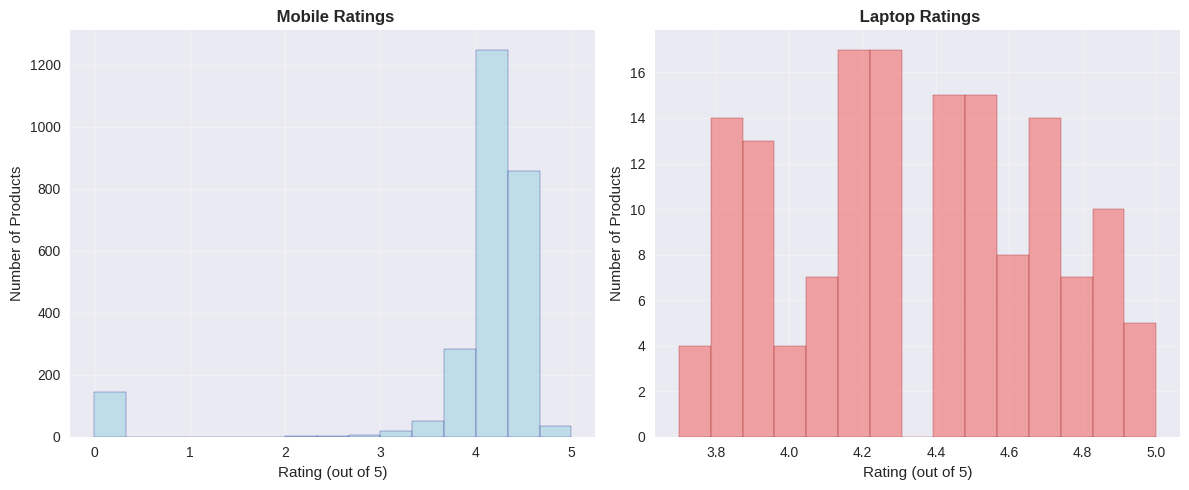

 Most mobiles rate between 4.0-4.5, while laptops have slightly higher ratings


In [22]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(mobile_data_clean['Rating'], bins=15, color='lightblue', edgecolor='navy', alpha=0.7)
plt.title(' Mobile Ratings', fontweight='bold')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Number of Products')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(laptop_data_clean['Rating'], bins=15, color='lightcoral', edgecolor='darkred', alpha=0.7)
plt.title(' Laptop Ratings', fontweight='bold')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Number of Products')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Most mobiles rate between 4.0-4.5, while laptops have slightly higher ratings")

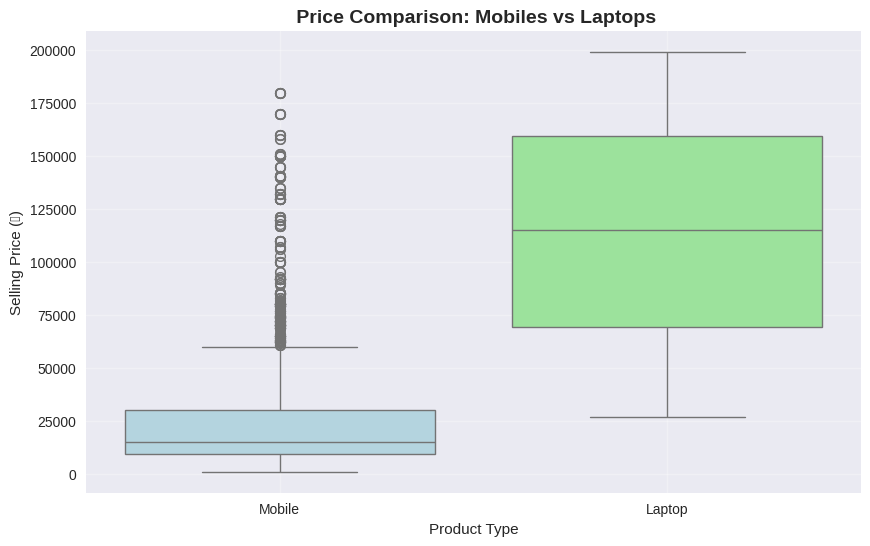

 Laptops are generally more expensive than mobiles, which makes sense!


In [23]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Product_Type', y='Selling Price', data=combined_data,
            palette=['lightblue', 'lightgreen'])
plt.title(' Price Comparison: Mobiles vs Laptops', fontweight='bold', fontsize=14)
plt.xlabel('Product Type')
plt.ylabel('Selling Price (₹)')
plt.grid(True, alpha=0.3)
plt.show()

print(" Laptops are generally more expensive than mobiles, which makes sense!")

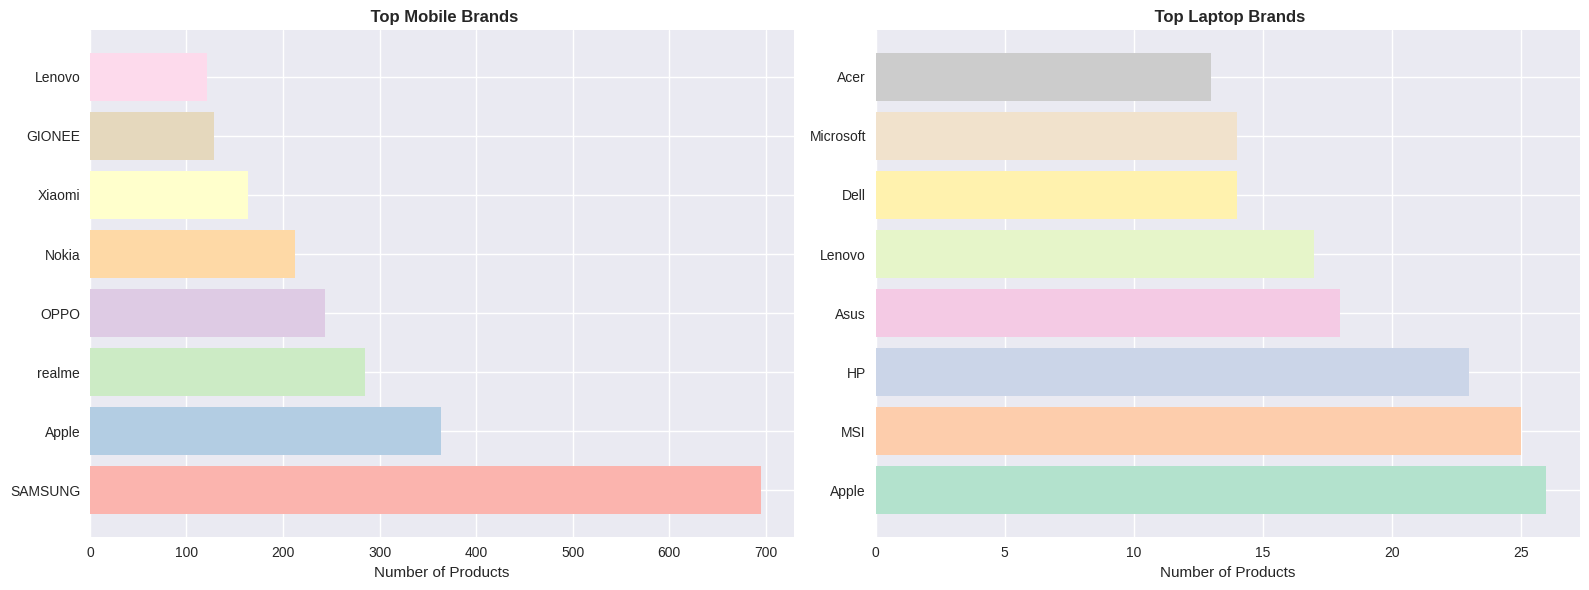

 Showing which brands have the most products in our dataset


In [24]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top mobile brands
top_mobiles = mobile_data_clean['Brand'].value_counts().head(8)
ax1.barh(top_mobiles.index, top_mobiles.values, color=plt.cm.Pastel1(range(len(top_mobiles))))
ax1.set_title(' Top Mobile Brands', fontweight='bold')
ax1.set_xlabel('Number of Products')

# Top laptop brands
top_laptops = laptop_data_clean['Brand'].value_counts().head(8)
ax2.barh(top_laptops.index, top_laptops.values, color=plt.cm.Pastel2(range(len(top_laptops))))
ax2.set_title(' Top Laptop Brands', fontweight='bold')
ax2.set_xlabel('Number of Products')

plt.tight_layout()
plt.show()

print(" Showing which brands have the most products in our dataset")

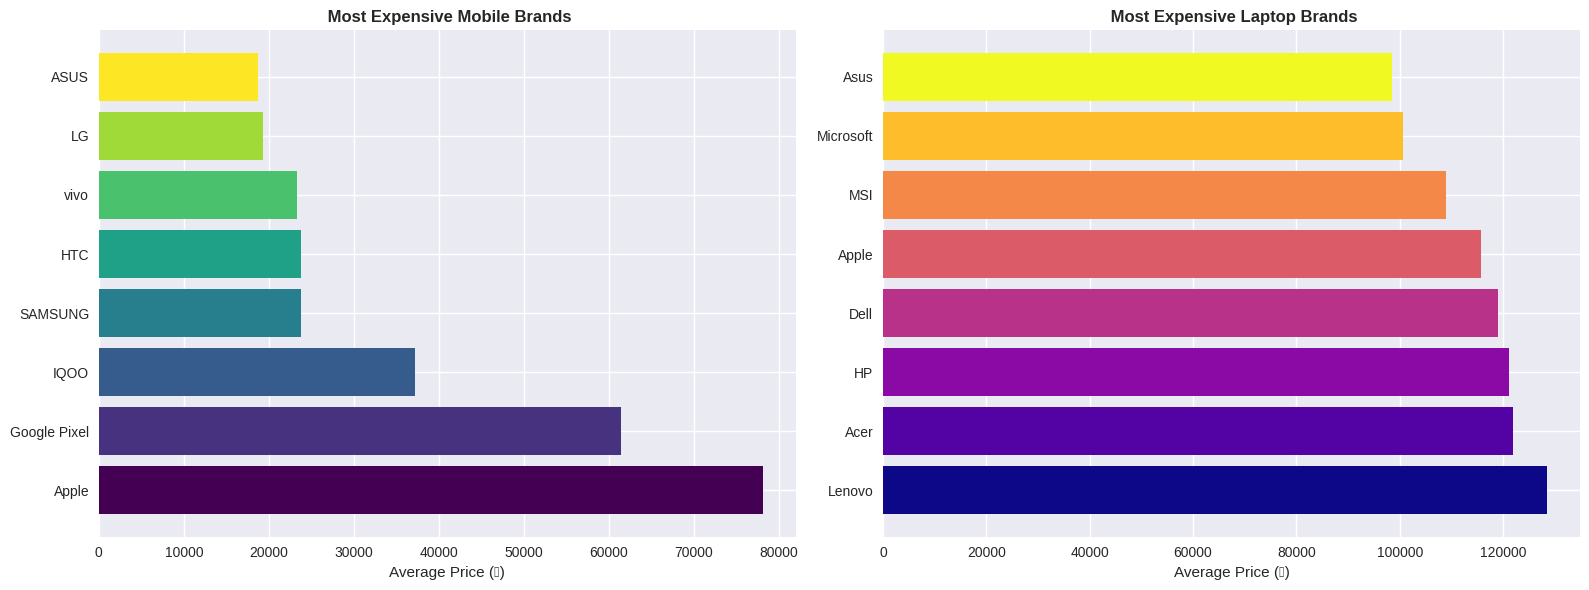

 Apple tends to be premium in both categories, but other brands vary


In [25]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Mobile prices by brand
mobile_prices = mobile_data_clean.groupby('Brand')['Selling Price'].mean().sort_values(ascending=False).head(8)
ax1.barh(mobile_prices.index, mobile_prices.values, color=plt.cm.viridis(np.linspace(0, 1, 8)))
ax1.set_title(' Most Expensive Mobile Brands', fontweight='bold')
ax1.set_xlabel('Average Price (₹)')

# Laptop prices by brand
laptop_prices = laptop_data_clean.groupby('Brand')['Selling Price'].mean().sort_values(ascending=False).head(8)
ax2.barh(laptop_prices.index, laptop_prices.values, color=plt.cm.plasma(np.linspace(0, 1, 8)))
ax2.set_title(' Most Expensive Laptop Brands', fontweight='bold')
ax2.set_xlabel('Average Price (₹)')

plt.tight_layout()
plt.show()

print(" Apple tends to be premium in both categories, but other brands vary")

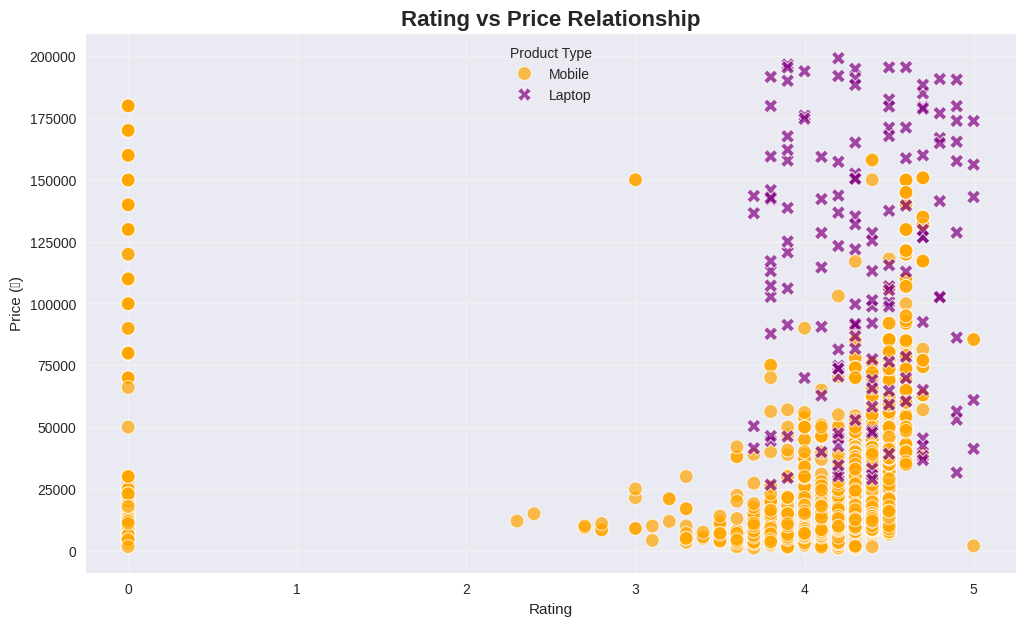

 Interesting! Higher ratings don't always mean higher prices - some affordable products get great ratings!


In [26]:

plt.figure(figsize=(12, 7))
sns.scatterplot(data=combined_data, x='Rating', y='Selling Price',
                hue='Product_Type', style='Product_Type',
                palette=['orange', 'purple'], s=100, alpha=0.7)
plt.title('Rating vs Price Relationship', fontweight='bold', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Price (₹)')
plt.legend(title='Product Type')
plt.grid(True, alpha=0.3)
plt.show()

print(" Interesting! Higher ratings don't always mean higher prices - some affordable products get great ratings!")

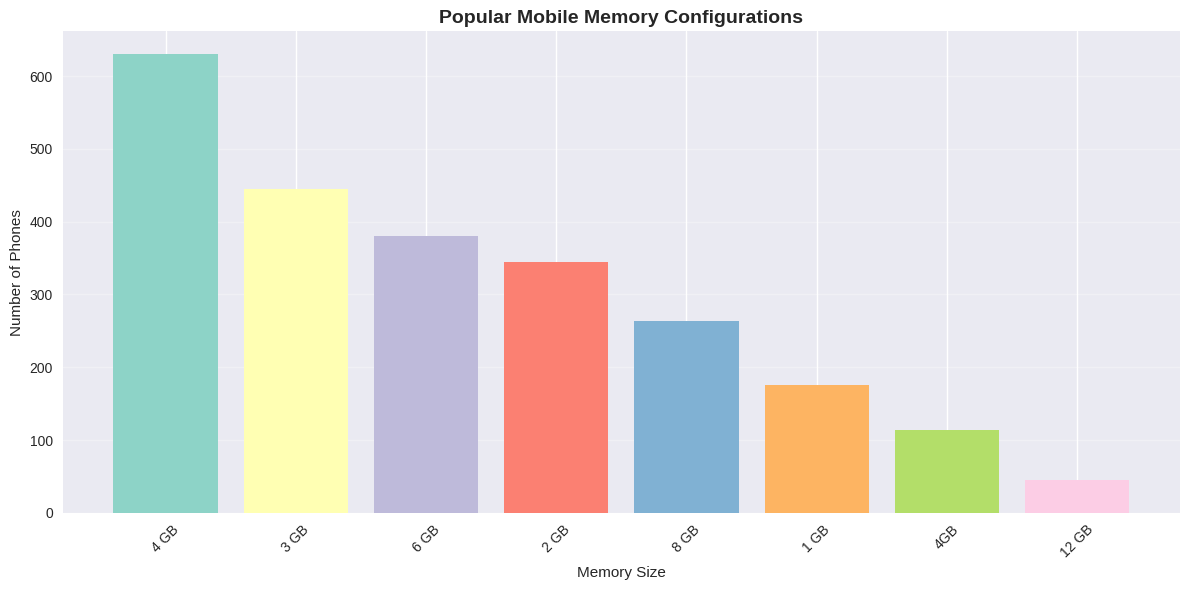

 128GB is the most common storage size for mobiles these days


In [27]:

if 'Memory' in mobile_data_clean.columns:
    plt.figure(figsize=(12, 6))
    memory_counts = mobile_data_clean['Memory'].value_counts().head(8)
    colors = plt.cm.Set3(range(len(memory_counts)))
    plt.bar(memory_counts.index, memory_counts.values, color=colors)
    plt.title('Popular Mobile Memory Configurations', fontweight='bold', fontsize=14)
    plt.xlabel('Memory Size')
    plt.ylabel('Number of Phones')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

    print(" 128GB is the most common storage size for mobiles these days")

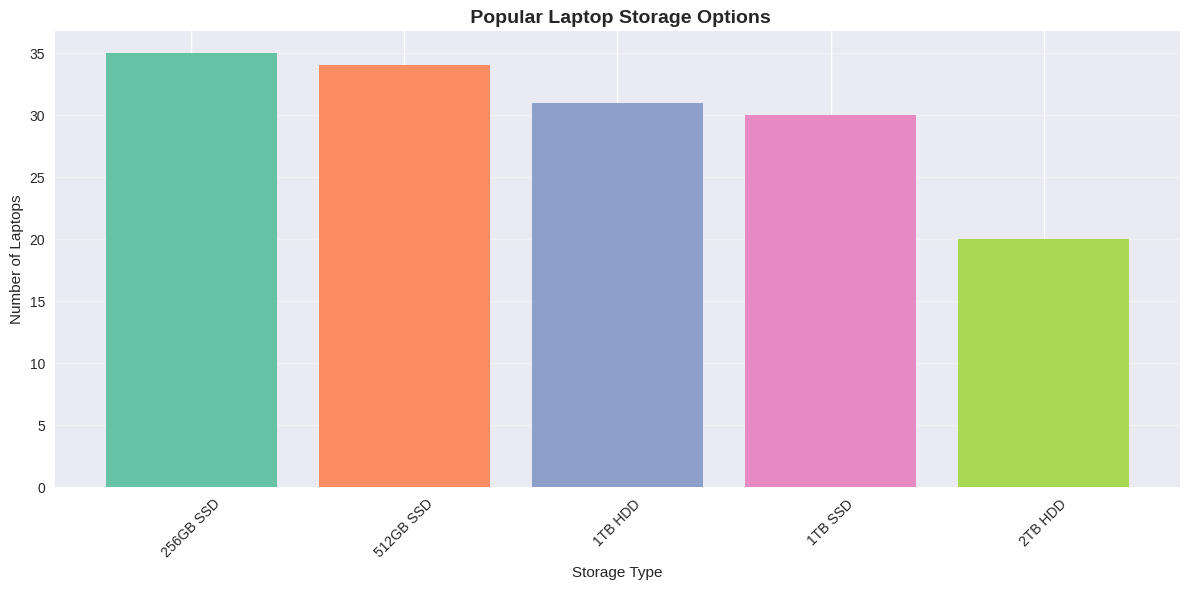

 512GB SSD is becoming the standard for laptops


In [28]:

if 'Storage' in laptop_data_clean.columns:
    plt.figure(figsize=(12, 6))
    storage_counts = laptop_data_clean['Storage'].value_counts().head(8)
    colors = plt.cm.Set2(range(len(storage_counts)))
    plt.bar(storage_counts.index, storage_counts.values, color=colors)
    plt.title(' Popular Laptop Storage Options', fontweight='bold', fontsize=14)
    plt.xlabel('Storage Type')
    plt.ylabel('Number of Laptops')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

    print(" 512GB SSD is becoming the standard for laptops")

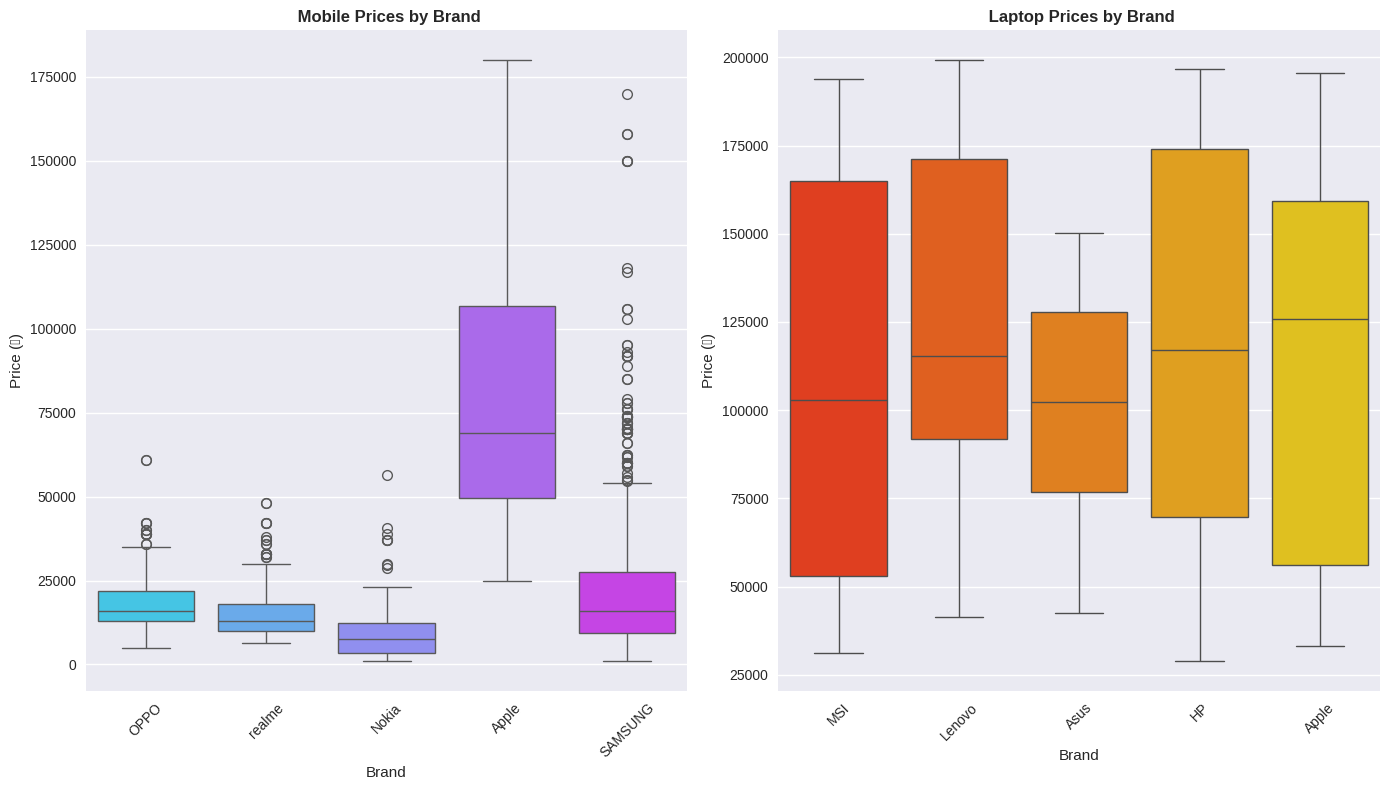

 Some brands have wider price ranges, offering both budget and premium options


In [29]:

plt.figure(figsize=(14, 8))

# Top 5 mobile brands price distribution
top_mobile_brands = mobile_data_clean['Brand'].value_counts().head(5).index
mobile_top = mobile_data_clean[mobile_data_clean['Brand'].isin(top_mobile_brands)]

plt.subplot(1, 2, 1)
sns.boxplot(x='Brand', y='Selling Price', data=mobile_top, palette='cool')
plt.title(' Mobile Prices by Brand', fontweight='bold')
plt.xlabel('Brand')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)

# Top 5 laptop brands price distribution
top_laptop_brands = laptop_data_clean['Brand'].value_counts().head(5).index
laptop_top = laptop_data_clean[laptop_data_clean['Brand'].isin(top_laptop_brands)]

plt.subplot(1, 2, 2)
sns.boxplot(x='Brand', y='Selling Price', data=laptop_top, palette='autumn')
plt.title(' Laptop Prices by Brand', fontweight='bold')
plt.xlabel('Brand')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(" Some brands have wider price ranges, offering both budget and premium options")

In [18]:

print("="*50)
print(" SUMMARY REPORT")
print("="*50)

print(f"\nPRODUCT COUNT:")
print(f"Mobiles: {len(mobile_data_clean)} products")
print(f"Laptops: {len(laptop_data_clean)} products")

print(f"\n AVERAGE RATINGS:")
print(f"Mobiles: {mobile_data_clean['Rating'].mean():.2f}/5")
print(f"Laptops: {laptop_data_clean['Rating'].mean():.2f}/5")

print(f"\n AVERAGE PRICES:")
print(f"Mobiles: ₹{mobile_data_clean['Selling Price'].mean():,.2f}")
print(f"Laptops: ₹{laptop_data_clean['Selling Price'].mean():,.2f}")

print(f"\n TOP BRANDS:")
print(f"Mobiles: {', '.join(mobile_data_clean['Brand'].value_counts().head(3).index.tolist())}")
print(f"Laptops: {', '.join(laptop_data_clean['Brand'].value_counts().head(3).index.tolist())}")

price_ratio = laptop_data_clean['Selling Price'].mean() / mobile_data_clean['Selling Price'].mean()
print(f"\n Laptops are {price_ratio:.1f}x more expensive than mobiles on average")

print("\n" + "="*50)
print(" KEY INSIGHTS:")
print("• Laptops generally cost more than mobiles")
print("• Both product categories have good average ratings (4+ stars)")
print("• Higher price doesn't always guarantee higher ratings")
print("• Popular brands dominate the market in both categories")

 SUMMARY REPORT

PRODUCT COUNT:
Mobiles: 2644 products
Laptops: 150 products

 AVERAGE RATINGS:
Mobiles: 4.00/5
Laptops: 4.34/5

 AVERAGE PRICES:
Mobiles: ₹26,461.36
Laptops: ₹114,230.34

 TOP BRANDS:
Mobiles: SAMSUNG, Apple, realme
Laptops: Apple, MSI, HP

 Laptops are 4.3x more expensive than mobiles on average

 KEY INSIGHTS:
• Laptops generally cost more than mobiles
• Both product categories have good average ratings (4+ stars)
• Higher price doesn't always guarantee higher ratings
• Popular brands dominate the market in both categories
